In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [2]:
width = 64
height = 64
dropout_rate = 0.4
dim = 3

In [ ]:
generator = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [ ]:
train_images = generator.flow_from_directory(directory=r"C:/Users/mhmdy/Desktop/ML_Course/cell_images/cell_images",target_size=(width,height),class_mode='binary',batch_size=32,subset='training')


In [ ]:
test_images = generator.flow_from_directory(directory=r"C:/Users/mhmdy/Desktop/ML_Course/cell_images/cell_images",target_size=(width,height),class_mode='binary',batch_size=32,subset='validation')

In [ ]:
model = Sequential()

model.add(Conv2D(64,dim,activation='relu',input_shape=(width,height,dim)))
model.add(MaxPooling2D())
model.add(Dropout(dropout_rate))
model.add(Conv2D(32,dim,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout_rate))
model.add(Conv2D(16,dim,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout_rate))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(lr=1e-4,decay=1e-4)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit_generator(generator=train_images,epochs=9,validation_data = test_images)

In [ ]:
model.save('CNN_malaria_classification')

In [3]:
saved_model = tf.keras.models.load_model('CNN_malaria_classification')

In [4]:
img = cv2.imread(r"C:/Users/mhmdy/Desktop/ML_Course/cell_images/testimg2.png")
img = cv2.resize(img,dsize=(width,height),interpolation=cv2.INTER_CUBIC)   

input_img = tf.keras.preprocessing.image.img_to_array(img)
input_img = np.array([input_img])
input_img = input_img.astype('float32') / 255.0

predictions = saved_model.predict(input_img)
predictions

array([[0.00601602]], dtype=float32)

In [5]:
# sigmoid is 1 when > 0.5 and 0 when < 0.5
# i knew the which class is which from train_images.class_indices

if predictions > 0.5:
    print("Uninfected")
else:
    print("Parasitized")

Parasitized


Parasitized


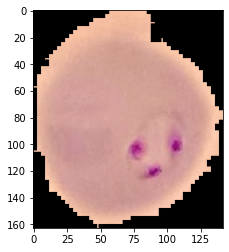

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# sigmoid is 1 when > 0.5 and 0 when < 0.5
# i knew the which class is which from train_images.class_indices

if predictions > 0.5:
    print("Uninfected")
else:
    print("Parasitized")
img = mpimg.imread(r"C:/Users/mhmdy/Desktop/ML_Course/cell_images/testimg2.png") #tested img
plot = plt.imshow(img)